In [9]:
# Instalando Biblioteca do Banco Central do Brasil
!pip install python-bcb

In [10]:
#ARRAY e DATAFRAME
import numpy as np
import pandas as pd

#PLOT
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#API BACEN
import bcb

#DADOS SGS
from bcb import sgs

In [11]:
#Coletar os indicadores, selecionar os códigos e a data de inicio da coleta
serie_hist = sgs.get({'selic': 432,
                      'igpm':189,
                      'ipca':433,
                      'inpc':188,
                      'ipca-alim_bebidas':1635,
                      'ipca-art_residencia':1637,
                      'ipca-vest':1638,
                      'ipca-trans': 1639,
                      'ipca-com': 1640,
                      'ipca-saude_cuidados_pessoais':1641,
                      'ipca-desp_pessoais': 1642,
                      'ipca-bens_sem_dur':10842,
                      'ipca-bens_nao_dur':10841,
                      'ipca-bens_dur':10843
                      }, start = '2013-01-01')
serie_hist = serie_hist.dropna()

In [12]:
serie_hist

,selic,igpm,ipca,inpc,ipca-alim_bebidas,ipca-art_residencia,ipca-vest,ipca-trans,ipca-com,ipca-saude_cuidados_pessoais,ipca-desp_pessoais,ipca-bens_sem_dur,ipca-bens_nao_dur,ipca-bens_dur
Date,,,,,,,,,,,,,,
2013-01-01,7.25,0.34,0.86,0.92,1.99,1.15,-0.53,0.75,-0.08,0.73,1.55,-0.35,2.34,0.86
2013-02-01,7.25,0.29,0.60,0.52,1.45,0.53,0.55,0.81,0.10,0.65,0.57,0.54,1.41,0.37
2013-03-01,7.25,0.21,0.47,0.60,1.14,0.11,0.15,-0.09,0.13,0.32,0.54,0.13,1.19,0.27
2013-04-01,7.25,0.15,0.55,0.59,0.96,0.63,0.65,-0.19,-0.32,1.28,0.61,0.57,0.88,0.09
2013-05-01,7.50,0.00,0.37,0.35,0.31,0.46,0.84,-0.25,0.08,0.94,0.41,0.67,0.11,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,13.75,-0.95,0.61,0.53,0.71,0.17,0.79,0.56,0.08,1.49,0.18,0.62,0.68,0.13
2023-05-01,13.75,-1.84,0.23,0.36,0.16,-0.23,0.47,-0.57,0.21,0.93,0.64,0.39,0.25,-0.09
2023-06-01,13.75,-1.93,-0.08,-0.10,-0.66,-0.42,0.35,-0.41,-0.14,0.11,0.36,0.21,-0.83,-1.24


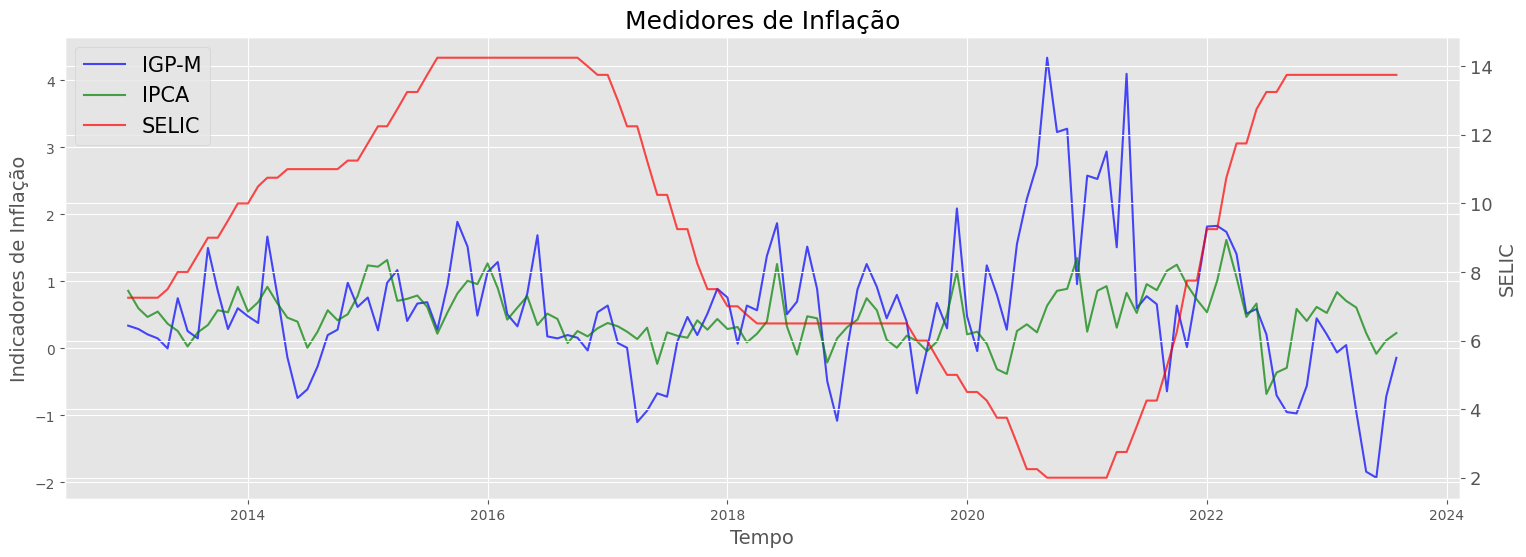

In [13]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Primeiro eixo (esquerda) para IGP-M e IPCA
ax1.set_title("Medidores de Inflação", fontsize=18)
ax1.plot(serie_hist["igpm"], label="IGP-M", alpha=0.7, color='blue')
ax1.plot(serie_hist["ipca"], label="IPCA", alpha=0.7, color='green')
ax1.set_xlabel("Tempo", fontsize=14)
ax1.set_ylabel("Indicadores de Inflação", fontsize=14)


ax2 = ax1.twinx()  # Crie um segundo eixo y compartilhando o mesmo eixo x
ax2.plot(serie_hist["selic"], label="SELIC", alpha=0.7, color='r')
ax2.set_ylabel("SELIC", fontsize=14)
ax2.legend(fontsize=15, loc="best")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Ajuste as legendas para as duas linhas no mesmo lugar
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc="best", fontsize=15)

plt.show()

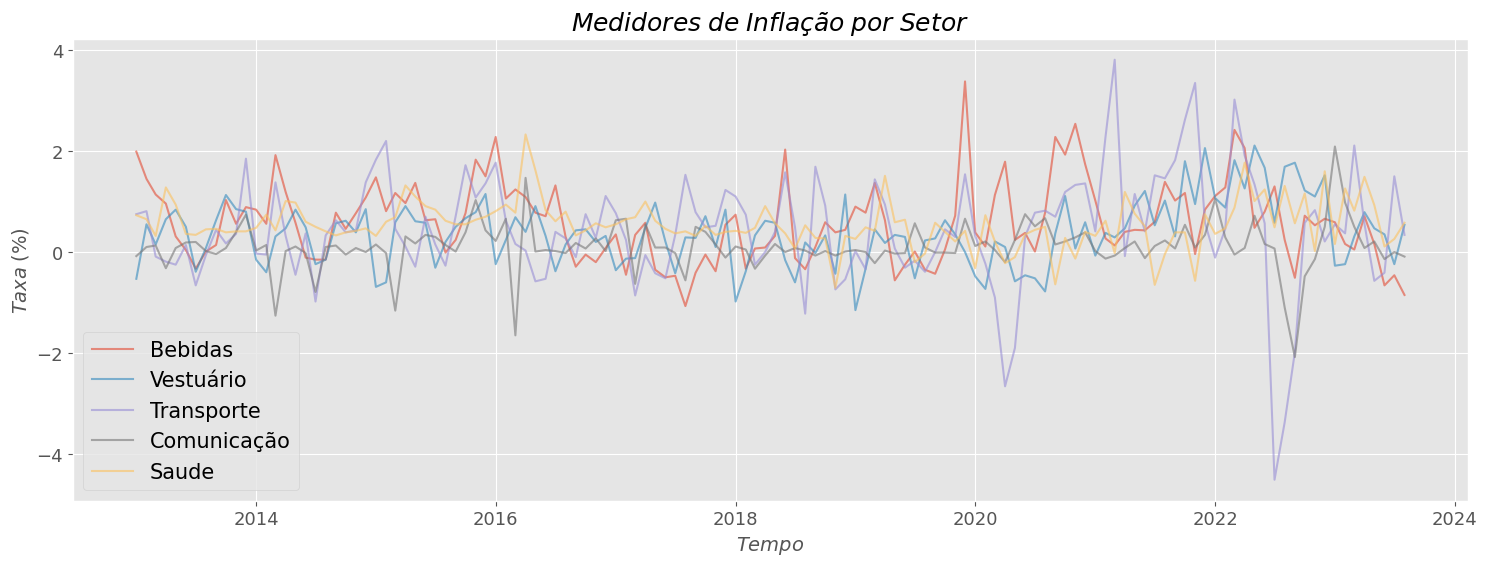

In [14]:
plt.figure(figsize=(18,6))
plt.title("$Medidores \; de \; Inflação \; por \; Setor$", fontsize=18)
for tipo, nome in zip(['ipca-alim_bebidas', 'ipca-vest','ipca-trans','ipca-com','ipca-saude_cuidados_pessoais'], ["Bebidas","Vestuário","Transporte","Comunicação","Saude"]):
  plt.plot(serie_hist[tipo], label=nome, alpha=.6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("$Tempo$", fontsize=14)
plt.ylabel("$Taxa \;(\%)$", fontsize=14)
plt.legend(fontsize=15, loc="best")
plt.show()

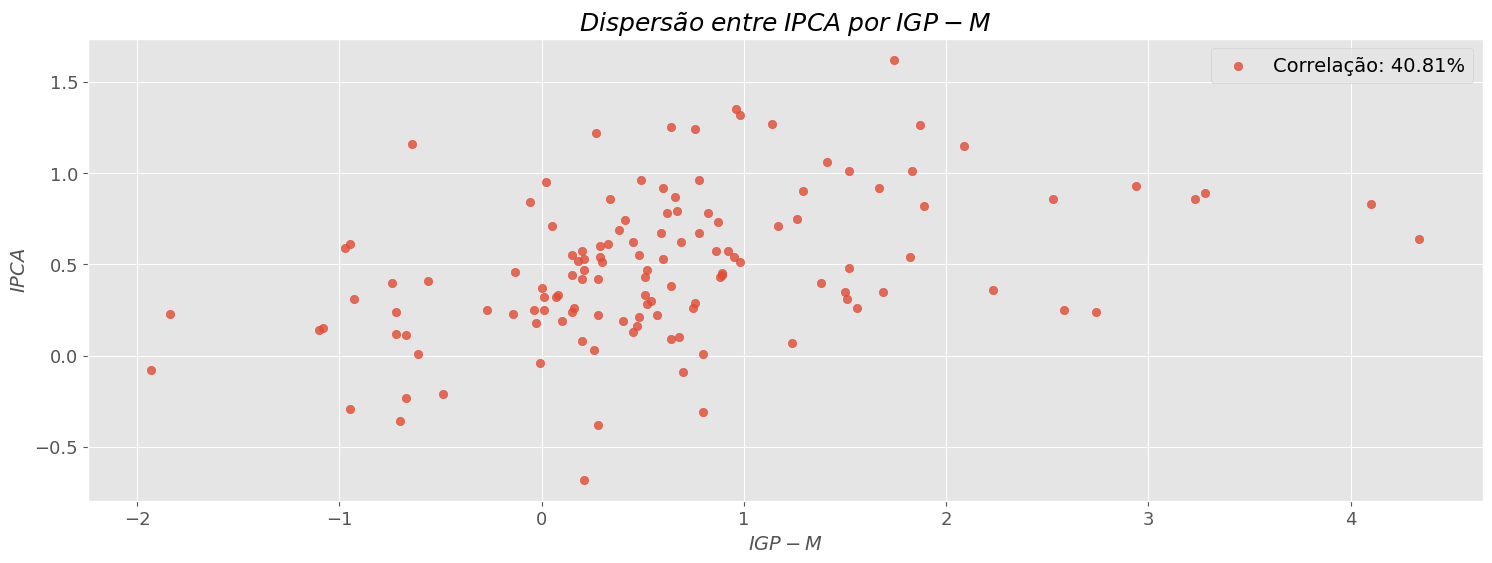

In [15]:
plt.figure(figsize=(18,6))
plt.title("$Dispersão \; entre \; IPCA \; por \; IGP-M$", fontsize=18)
plt.scatter(serie_hist["igpm"], serie_hist["ipca"], alpha=.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("$IGP-M$", fontsize=14)
plt.ylabel("$IPCA$", fontsize=14)
plt.legend(["Correlação: {:.2f}%".format(np.corrcoef(serie_hist["igpm"], serie_hist["ipca"])[0][1]*100)], fontsize=14)
plt.show()

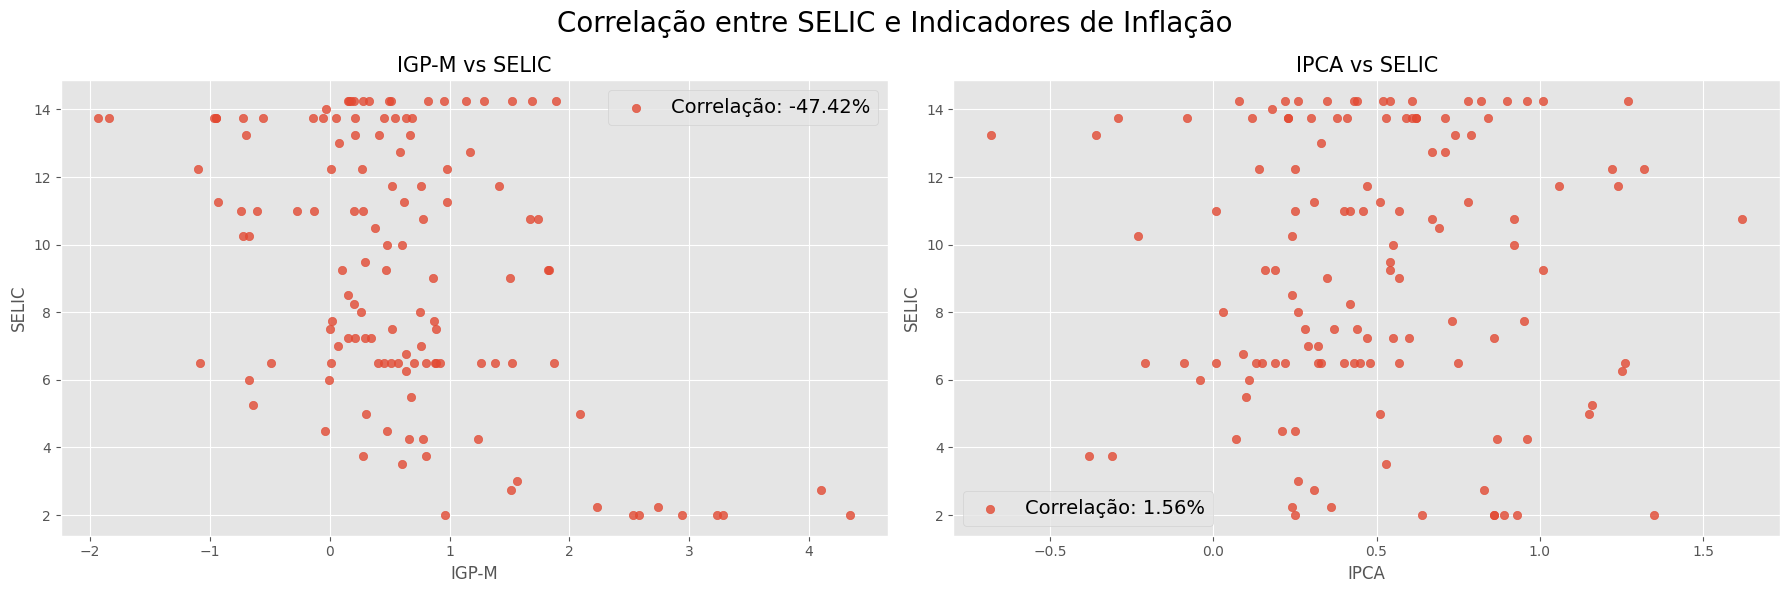

In [16]:
# Plot IGPM
plt.figure(figsize=(18, 6))
plt.subplot(121)  # Subplot da esquerda
plt.title("IGPM")
plt.scatter(serie_hist["igpm"], serie_hist["selic"], alpha=0.8)
plt.xlabel("IGP-M")
plt.ylabel("SELIC")
plt.title("IGP-M vs SELIC", fontsize=15)
plt.legend(["Correlação: {:.2f}%".format(np.corrcoef(serie_hist["igpm"], serie_hist["selic"])[0][1]*100)], fontsize=14)

# Plot IPCA
plt.subplot(122)  # Subplot da direita
plt.title("IPCA")
plt.scatter(serie_hist["ipca"], serie_hist["selic"], alpha=0.8)
plt.xlabel("IPCA")
plt.ylabel("SELIC")
plt.title("IPCA vs SELIC", fontsize=15)
plt.legend(["Correlação: {:.2f}%".format(np.corrcoef(serie_hist["ipca"], serie_hist["selic"])[0][1]*100)], fontsize=14)

# Exibe a correlação entre IGPM e IPCA
plt.suptitle("Correlação entre SELIC e Indicadores de Inflação", fontsize=20)
plt.tight_layout()
plt.show()
